In [248]:
#Sebastian Russo

#Import necessary libraries
#Library to manipulate and analyze datasets 
import pandas as pand 

#------------------------------------------------------------------------------------------------
#Import Decision Tree model using the training set and required metrics
#Library to import only to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

#self-explanatory (model to be imported)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To import the class in for feature scaling (standardize the range of independent variables)
from sklearn.preprocessing import StandardScaler #COMPLETELY OPTIONAL

#From the metrics module, import accurracy, f1, precision, recall and classification report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
#------------------------------------------------------------------------------------------------
#Imports for Confusion Matrix and other data visualization
#Library to make python matplotlib work like MATLAB
import matplotlib.pyplot as matplib  

#Library for confusion matrix visualization
from sklearn.metrics import confusion_matrix  

#Library for data visualization and correlation matrix
import seaborn as sns 

In [249]:
#Import data set
dfiris= pand.read_csv("Iris.csv",index_col=0) 
#Nothing else necessary since it is a .csv, has header and "," as delimiters
#index_col=0 to set the column at location 0 "ID" as the index for all rows

#View shape of dataset
print("Dataset shape:",dfiris.shape)

#Analyze dataset
dfiris.head(102)

#Needs to be checked for missing data, Categorical-Numerical conversion and Shuffling

Dataset shape: (150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
98,6.2,2.9,4.3,1.3,Iris-versicolor
99,5.1,2.5,3.0,1.1,Iris-versicolor
100,5.7,2.8,4.1,1.3,Iris-versicolor


In [250]:
#Check if there is any missing values in the data
nummissingvalues=dfiris.isna().sum()

#Print to see the missing values
print(nummissingvalues)

#No missing data

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [251]:
#Convert Categorical data from Species column into numerical variables
dfiris["Species"]=dfiris["Species"].map(
    {"Iris-setosa":0 , "Iris-versicolor":1, "Iris-virginica":2}
)

#Re-Analyze dataset
dfiris.head(102)

#Dataset is now fully numerical

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
98,6.2,2.9,4.3,1.3,1
99,5.1,2.5,3.0,1.1,1
100,5.7,2.8,4.1,1.3,1


In [252]:
#Shuffle the dataset to the maximum possible
dfiris = dfiris.sample(frac=1, random_state=42).reset_index(drop=True)

#Re-Re-analize dataset
dfiris.head(102)

#Now the order of dataset is completely shuffled and order bias is avoided

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
97,4.3,3.0,1.1,0.1,0
98,6.0,2.2,5.0,1.5,2
99,7.2,3.2,6.0,1.8,2
100,4.6,3.1,1.5,0.2,0


In [253]:
#Split dataset into features for X and Y 
Xvariable=dfiris.iloc[:,:4] #From SepalLengthCm to PetalWidthCm
Yvariable=dfiris.iloc[:,-1] #Just Species

#Alternatives
#Xvariable=dfiris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
#Yvariable=dfiris[["Species"]]

#Check size for both 
print("Idependent variables:",Xvariable.shape)

print("Dependent variables:",Yvariable.shape)

Idependent variables: (150, 4)
Dependent variables: (150,)


In [254]:
#Split the Independent and Dependent variables into training and 
#testing sets (80%, 20%), also reshuffle it again
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    Xvariable,Yvariable,test_size=0.2,random_state=42
)

#Verify the shape for each split
print("Xtrain set:",Xtrain.shape)
print("Xtest set:",Xtest.shape)
print("Ytrain set:",Ytrain.shape)
print("Ytest set:",Ytest.shape)

Xtrain set: (120, 4)
Xtest set: (30, 4)
Ytrain set: (120,)
Ytest set: (30,)


In [255]:
#Feature scaling for better performance
Xtrain=StandardScaler().fit_transform(Xtrain)
Xtest=StandardScaler().fit_transform(Xtest)

In [256]:
#Initialize the Decision Tree Classifier
Dtreeclassif = DecisionTreeClassifier()

Dtreeclassif.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [257]:
#Predict the outcome
predictY= Dtreeclassif.predict(Xtest)

#Check real values vs the predicted values
print("Actual values ",Ytest.values[0:30])
print("Predict values",predictY[0:30])

Actual values  [2 1 1 0 2 0 1 1 0 0 1 0 1 1 2 0 2 1 1 0 0 2 2 0 2 1 0 2 1 0]
Predict values [2 1 1 0 2 0 1 1 0 0 1 0 2 1 2 0 2 1 1 0 0 2 2 0 2 1 0 2 1 0]


Simple confusion Matrix:
[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]


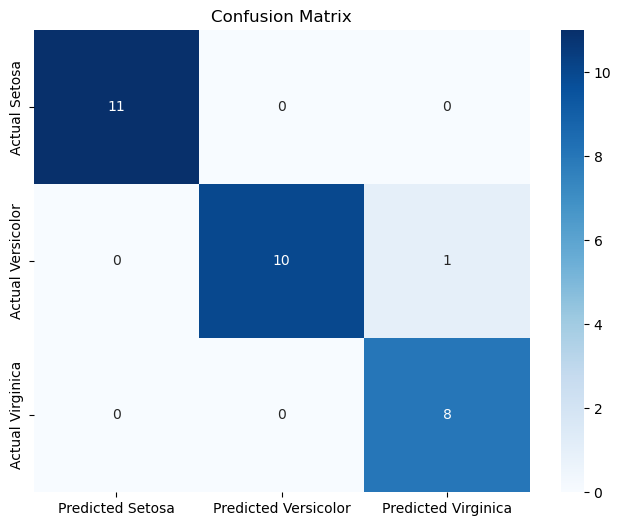

In [258]:
#Confusion matrix 
confmat = confusion_matrix(Ytest, predictY)

#Print confusion matrix
print("Simple confusion Matrix:")
print(confmat)

#Create a heatmap to visualize the confusion matrix
matplib.figure(figsize=(8, 6))
sns.heatmap(confmat, annot=True, fmt='d',
            cmap='Blues',
            xticklabels=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'], 
            yticklabels=['Actual Setosa', 'Actual Versicolor', 'Actual Virginica'])
matplib.title('Confusion Matrix')
matplib.show()

In [259]:
#Check acurracy of this model (all same as Logistic regression)
acurracy= accuracy_score(Ytest,predictY) #Ranges (0,1), the closer to 1 the better
print("Average Acurracy: ",acurracy)

#Since this a multiclass (3) problems, use average="weighted" parameter to calculate 
#the metrics for each class separately then averages them
#Calculate precision
precision = precision_score(Ytest, predictY, average='weighted')#Weighted by the number of true instances for each class
print("Weighted avg Precision:", precision)

#Calculate recall
recall = recall_score(Ytest, predictY, average='weighted')#Weighted by the number of true instances for each class
print("Weighted avg Recall:", recall)

# Calculate F1 score
f1 = f1_score(Ytest, predictY, average='weighted')#Weighted by the number of true instances for each class
print("Weighted avg F1 Score:", f1)

#Print the classification report
clfrep= classification_report(Ytest,predictY)
print(clfrep)

Average Acurracy:  0.9666666666666667
Weighted avg Precision: 0.9703703703703703
Weighted avg Recall: 0.9666666666666667
Weighted avg F1 Score: 0.9668534080298786
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.91      0.95        11
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



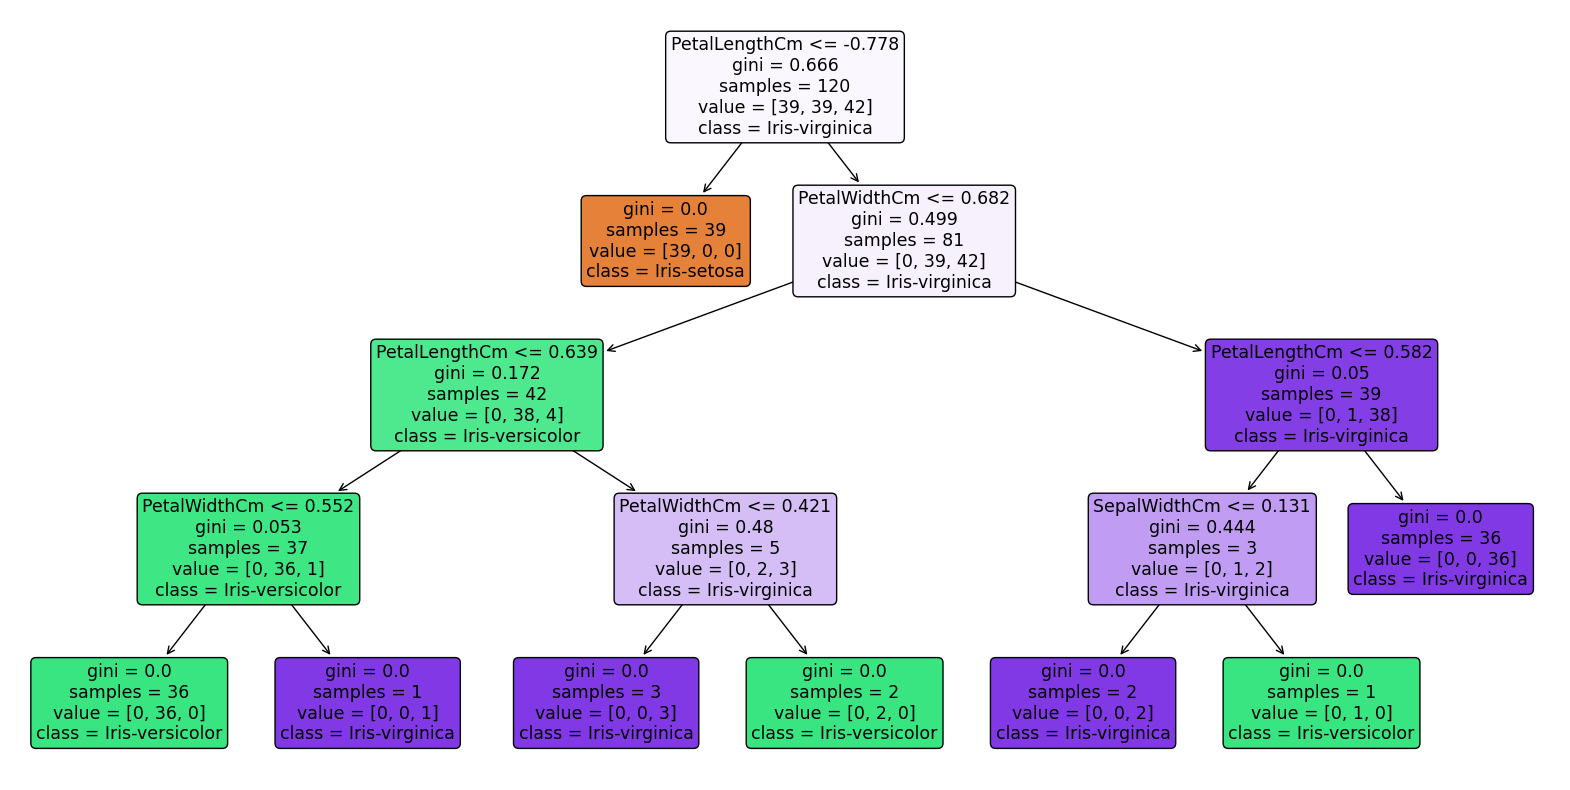

In [260]:
#Feature and classes names
features=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
classes=["Iris-setosa","Iris-versicolor","Iris-virginica"]

#Plot the decision tree for better resolution and show it 
matplib.figure(figsize=(20,10))  # Increase the figure size to improve quality
tree.plot_tree(Dtreeclassif, feature_names=features, class_names=classes,
        filled=True, rounded=True
)
matplib.show()